<a href="https://colab.research.google.com/github/YXGuan/FakeNews_dataset/blob/main/4AI3_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
Authors: 加上你的名字
Yuxiang Guan 400229902

https://docs.google.com/document/d/1iCvO3fqGXb1r2Cxdq-Nzc1CiKOIg9U5Q1GTY-4fAKgo/edit

First of all, we need to perform data cleaning, for example we need to remove punctuations as well as texts that are too short.
Then we split the data into training and testing

When it comes to deep learning, we need to utilize a model with multiple layers. In this case, since we are processing text data, we need  to build an RNN model with long-short term memory.

Before training the model, it is important to perform feature extraction. This process helps identify the most informative and discriminating features that can improve the model's performance. Feature extraction reduces the dimensionality of the dataset and creates a dataset for the principal components. In this supervised learning project, clustering for data is not necessary.

(RNN is designed for processing sequences of data,utilizing a hidden state to maintain memory of previous inputs and capture temporal dependencies.

A compilation of information that reflects the “current” condition of the environment is referred to as short-term memory. The short-term memory is updated by any differences between information that is kept in it and a “new” state. Conversely, information retained for an extended period of time or permanently is referred to as long-term memory.)

Lastly, with the model and the pre processed data ready, we can now train (fit) the model, and evaluate it, which eventually returns accuracy.


In [1]:
# install libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pwd

'/content'

In [3]:
!git clone https://github.com/YXGuan/FakeNews_dataset.git

Cloning into 'FakeNews_dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 11.33 MiB | 27.43 MiB/s, done.


In [4]:
cd /content/FakeNews_dataset

/content/FakeNews_dataset


In [5]:
pwd

'/content/FakeNews_dataset'

In [6]:
!unzip news.csv.zip

Archive:  news.csv.zip
  inflating: news.csv                
  inflating: __MACOSX/._news.csv     


In [7]:
data = pd.read_csv('/content/FakeNews_dataset/news.csv')
data.shape

(6335, 4)

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
# Check how the labels are distributed
print(np.unique(data['label']))
print(np.unique(data['label'].value_counts()))

['FAKE' 'REAL']
[3164 3171]


**Text cleaning and processing steps-**

* Remove punctuations
* Convert text to tokens
* Remove tokens of length less than or equal to 3
* Remove stopwords using NLTK corpus stopwords list to match
* Apply lemmatization
* Convert words to feature vectors

In [10]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [11]:
data['removed_punc'] = data['text'].apply(lambda x: remove_punct(x))
data.head()

,Unnamed: 0,title,text,label,removed_punc
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [12]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [13]:
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr..."


In [14]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [15]:
data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton..."


In [16]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined
    list could be created and used to limit the matches in input text.
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
data['clean_tokens'] = data['filtered_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [19]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [22]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [23]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


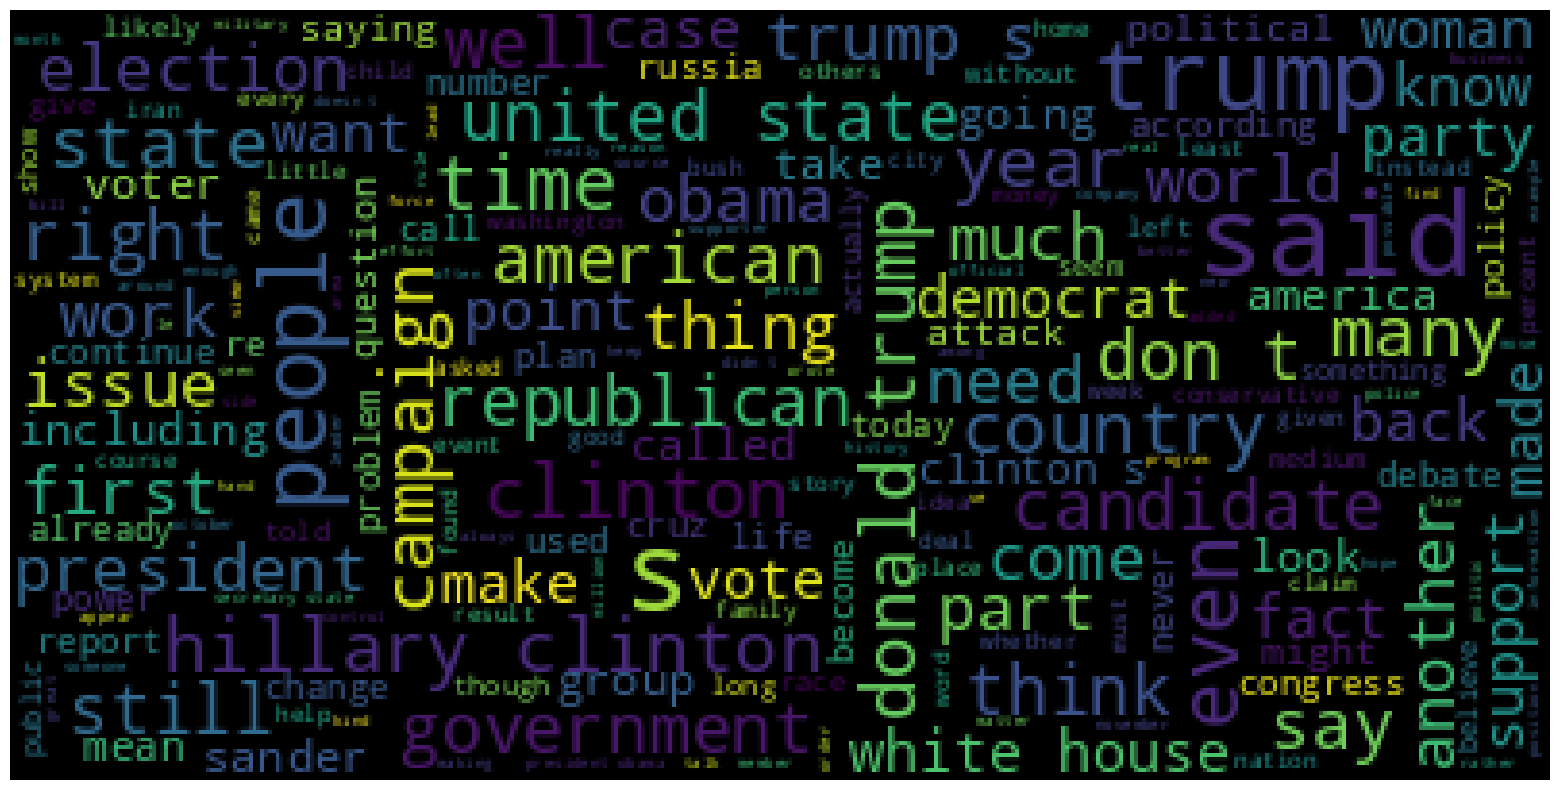

In [24]:
# Generate a basic word cloud
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
# Prepare data for the model. Convert label in to binary

data['label'] = [1 if x == 'FAKE' else 0 for x in data['label']]
data.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


In [26]:
# Split the dataset

X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['label'], test_size=0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(5068,)
(1267,)


**TF-IDF : Term Frequency - Inverse Document Frequency**

The term frequency is the number of times a term occurs in a document. Inverse document frequency is an inverse function of the number of documents in which that a given word occurs.

The product of these two terms gives tf-idf weight for a word in the corpus. The higher the frequency of occurrence of a word, lower is it's weight and vice-versa. This gives more weightage to rare terms in the corpus and penalizes more commonly occuring terms.

Other widely used vectorizer is Count vectorizer which only considers the frequency of occurrence of a word across the corpus.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

print(tfidf_train.toarray())
print(tfidf_train.shape)
print(tfidf_test.toarray())
print(tfidf_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5068, 68134)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1267, 68134)


**Passive Aggressive Classifiers**

* Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting.
* Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model.
* Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

These are typically used for large datasets where batch learning is not possible due to huge volumes of frequently incoming data.

* Some important parameters -
* C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
* max_iter : The maximum number of iterations the model makes over the training data.
* tol : The stopping criterion.

For more details please refer to description source - https://www.geeksforgeeks.org/passive-aggressive-classifiers/

We are using a simple implementation of this model here.

In [28]:
# Passive Aggresive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

pred1 = pac.predict(tfidf_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred1)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred1)))

Accuracy score : 0.9392265193370166
Confusion matrix : 
 [[591  39]
 [ 38 599]]


In [29]:
############33 TODO: making a prediction
print (tfidf_test[0])
print("true result")
print(y_test[0])
print("predicted result")
print(pred1[0])

  (0, 67250)	0.029292525309575143
  (0, 66668)	0.13771529280760067
  (0, 65826)	0.03657597209977452
  (0, 65380)	0.13978547844943523
  (0, 63432)	0.07918787545043043
  (0, 61822)	0.07714741593087243
  (0, 61576)	0.06965754882809028
  (0, 60724)	0.07522743425544205
  (0, 60335)	0.04347336570932734
  (0, 58084)	0.04947117652334747
  (0, 57178)	0.06281487286410388
  (0, 55644)	0.03736686414427446
  (0, 54880)	0.07253323360785634
  (0, 54722)	0.09425387166686754
  (0, 54719)	0.14553809365199605
  (0, 54678)	0.046645615759925936
  (0, 53914)	0.07269009176561703
  (0, 53347)	0.044352399608672016
  (0, 52928)	0.1338479458376862
  (0, 52877)	0.026238725882961868
  (0, 51818)	0.03499987223915739
  (0, 50714)	0.12883182582395583
  (0, 48483)	0.06097815882669449
  (0, 47884)	0.08820212230326095
  (0, 45511)	0.07755781644098271
  :	:
  (0, 15207)	0.07068180688769402
  (0, 13755)	0.036393735438285446
  (0, 13181)	0.10938480420885853
  (0, 13111)	0.17338545434990418
  (0, 12453)	0.09684089910708367


In [30]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(tfidf_train, y_train)
print('Logistic Regression model fitted..')

pred2 = lr.predict(tfidf_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred2)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred2)))

Logistic Regression model fitted..
Accuracy score : 0.9179163378058406
Confusion matrix : 
 [[565  65]
 [ 39 598]]


Logistic Regression could not outperform XGBoost and LGBM but its performance is considerably close to them and it is much less complex.

In [31]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(tfidf_train, y_train)

print('XGBoost Classifier model fitted..')
pred3 = xgb.predict(tfidf_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred3)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred3)))

XGBoost Classifier model fitted..
Accuracy score : 0.9273875295974744
Confusion matrix : 
 [[578  52]
 [ 40 597]]


In [32]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(tfidf_train, y_train)

print('LightGBM Classifier model fitted..')
pred = lgbm.predict(tfidf_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

[LightGBM] [Info] Number of positive: 2527, number of negative: 2541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.818134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354681
[LightGBM] [Info] Number of data points in the train set: 5068, number of used features: 8289
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498619 -> initscore=-0.005525
[LightGBM] [Info] Start training from score -0.005525
LightGBM Classifier model fitted..
Accuracy score : 0.9321231254932912
Confusion matrix : 
 [[584  46]
 [ 40 597]]


In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['label'], test_size=0.2, random_state = 5)

# Sample data - you should replace this with your dataset
# texts = ["Real news text 1", "Fake news text 1", "Real news text 2", "Fake news text 2"]
# labels = [1, 0, 1, 0]  # 1 for real news, 0 for fake news

# Tokenization
max_words = 10000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
data = pad_sequences(sequences, maxlen=100)  # Sequence padding to a fixed length

# Build an RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
model.fit(data, y_train, epochs=2, batch_size=32)

# Predict on new data
new_texts = ["Real news text 3", "Fake news text 3"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=100)
predictions = model.predict(new_data)





for i, text in enumerate(new_texts):
    print(f"Text: {text} is {['Fake', 'Real'][int(predictions[i] > 0.5)]} news (Probability: {predictions[i][0]:.2f})")


Epoch 1/2
159/159 [==============================] - 17s 91ms/step - loss: 0.4224 - accuracy: 0.8072
Epoch 2/2
1/1 [==============================] - 1s 771ms/step
Text: Real news text 3 is Real news (Probability: 0.69)
Text: Fake news text 3 is Real news (Probability: 0.74)


In [34]:
print(y_test)

1227    1
5803    1
4976    0
1112    1
6083    1
       ..
4502    1
5363    0
5660    1
4955    0
1931    1
Name: label, Length: 1267, dtype: int64


In [35]:
new_sequences2 = tokenizer.texts_to_sequences(X_test)
new_data2 = pad_sequences(new_sequences2, maxlen=100)
predictions2 = model.predict(new_data2)


40/40 [==============================] - 1s 23ms/step


In [36]:
test_loss, test_acc = model.evaluate(new_data2,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

40/40 - 3s - loss: 0.3029 - accuracy: 0.8769 - 3s/epoch - 68ms/step

Test accuracy: 0.8768745064735413


In [37]:
# for i, text in enumerate(X_test):
#     print(f"Text: {i} is {['Fake', 'Real'][int(predictions2[i] > 0.5)]} news (Probability: {predictions2[i][0]:.2f})")


In [38]:
# print("Accuracy score : {}".format(accuracy_score(y_test, predictions2)))
# print("Confusion matrix : \n {}".format(confusion_matrix(y_test, predictions2)))

References:
https://github.com/LeadingIndiaAI/-Fake-News-Detection-/blob/master/NaiveBayes.ipynb

https://www.kaggle.com/code/shubha23/fake-news-detection-text-pre-processing-using-nltk/notebook

https://www.nltk.org/data.html

Project 7: Fake News Detection
Source: Fake news dataset
Description:
Social media has provided an excellent interactive technology platform that
allows the creation, sharing, and exchange of interests, ideas, or information via
virtual networks very quickly. A new platform enables endless opportunities for
marketing to reach new or existing customers. However, it has also opened the
devil’s door for falsified information which has no proven source of
information, facts, or quotes. It is really hard to detect whether the given news
or information is correct or not. Here, as a part of this project, we need to detect
the authenticity of given news using DL.
The dataset contains around 7k fake news, including a title, body, and label
(FAKE or REAL). The task is to train the data to predict if the given news is
fake or real.
Project Outcomes:
• Pre-process the data to remove stop words. Stop words are the most occurring
words in the language. It’s necessary to filter that out first.
• Evaluate the various algorithms which can affect the best outcome
• Train a model to predict the likelihood of REAL news.